Hi again!

Here's some more detail to make sure you're comfortable running in VScode - for the case Colab has hiccups and for better development efficiency.
1. Make sure python is installed on the machine; if not download and install using https://www.python.org/downloads/ or https://docs.anaconda.com/free/miniconda/
1. File --> Open Folder --> choose the folder to which you download course's notebooks. You may want to save the workspace.
1. Click a notebook (ipynb). VScode will guide you through installing python and jupyter plugins.
1. ```[optional]``` Click "python" in top right corner --> select another kernel --> python environments --> create python environment --> venv --> create in your folder. Virtual environments are handy to have different package versions per different projects, avoiding messing with global python install, etc etc. 
1. ```[bonus]``` Educate yourself on how to:
    1. Do the same venv **creation & activation** in command line (CLI) with either ```virtualenv``` (or ```conda```) commands, then ```.\myenv\Scripts\activate```
    1. Running a server,  ```pip/conda install jupyterlab``` then ```jupyterlab``` . 
    1. Connecting in VScode to venv created on CLI.  Connecting in either browser or VScode to server you ran from CLI.


In [7]:
# Verify our packages are installed, using jupyter magic (%) to rule out discrepancy between the virtualenv addressed by terminal and the one used by notebook
%pip install numpy matplotlib pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


# <div dir=rtl> חבילות - numpy </div>



In [3]:
import numpy as np

In [4]:
x = np.zeros((3,4))
x

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
y=np.ones((3,4))
y

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [6]:
x = np.eye(3)
x

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
print(x.ndim)
print(x.shape)
print(x.size)

2
(3, 3)
9


<div dir=rtl> 
    לכל מטריצה יש פרמטר נוסף - dtype - הקובע אילו ערכים יכולים להיות בכל תא ("מעל איזה שדה המטריצה מוגדרת")
</div>

 - np.int8
 - np.int16
 - np.int32
 - np.float32
 - np.bool_
 - np.string_ 
 - np.object
 - ...

In [8]:
x.dtype

dtype('float64')

In [9]:
x_int = x.astype('int')
x_int, x.dtype, x_int.dtype

(array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 dtype('float64'),
 dtype('int32'))

In [10]:
y=np.empty((3,4), dtype=object)
y

array([[None, None, None, None],
       [None, None, None, None],
       [None, None, None, None]], dtype=object)

In [11]:
# This is a permissive-insertion matrix 
y[0,0] = [1,2,3]
y[1,0] = 'blah'
y

array([[list([1, 2, 3]), None, None, None],
       ['blah', None, None, None],
       [None, None, None, None]], dtype=object)

<div dir=rtl> 
לא ניתן לעדכן אינדקס במערך מסוג int עם אובייקט שהוא לא int
</div>

In [12]:
x[0,0]='rty'      # fails
#x_int[0,0]='rty' # fails
#x_int[0,0]='5'   # works. TODO: why? what happened?

ValueError: could not convert string to float: 'rty'

## <div dir=rtl> פעולות אלגבריות </div>
<div dir=rtl>
    כל הפעולות האלגבריות מאלגברה לינארית תקפות כאן, בתנאי שהן מוגדרות.
</div>

In [13]:
x = np.array([1,2,3,4,5,6,7,8,9]).reshape((3,3))
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [14]:
x2= np.ones((4,3))
x2

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [15]:
np.dot(x,x2)
# (3x3) x (4x3)

ValueError: shapes (3,3) and (4,3) not aligned: 3 (dim 1) != 4 (dim 0)

כמובן שזה לא מוגדר....

In [16]:
np.dot(x, x2.T)
# (3x3) x (3x4)

array([[ 6.,  6.,  6.,  6.],
       [15., 15., 15., 15.],
       [24., 24., 24., 24.]])

**np.dot():**

If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).

If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.

If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

In [54]:
# np.dot?
# np.matmul?
x = np.random.random((2,5))
x.T @ x, x @ x.T

(array([[0.43027455, 0.30237347, 0.19019196, 0.67631684, 0.56788618],
        [0.30237347, 0.21771857, 0.12982708, 0.50603392, 0.43333924],
        [0.19019196, 0.12982708, 0.08687511, 0.27641643, 0.22591992],
        [0.67631684, 0.50603392, 0.27641643, 1.24401546, 1.0942014 ],
        [0.56788618, 0.43333924, 0.22591992, 1.0942014 , 0.97406183]]),
 array([[1.72908788, 1.3481003 ],
        [1.3481003 , 1.22385763]]))

## <div dir=rtl>  ווקטוריזציה ופונקציות אוניברסליות</div>
<div dir=rtl>
    שיטת תכנות בה מחליפים לולאות בפעולות על מטריצה נקראת ווקטוריזציה. <br />
    פונקציות אוניברסליות (או ufunc) הן פונקציות אשר פועלות על כל אלמנט בנפרד. <br />
    פעולות מטריציוניות ופונקציות אוניברסליות בנאמפיי ממומשות באופן מאוד יעיל ויכולות לחסוך זמן חישוב באופן משמעותי, עד כדי כך שחישובים מסויימים יכולים להיות בלתי אפשריים בלעדיהם.<br />
    פונקציות אוניברסליות שימושיות:
</div>

 - add/subtract ( + / - )
 - multiply ( .* )
 - divide ( ./ )
 - maximum
 - minimum
 - exp
 - power
 - ...
 
https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs




 <div dir=rtl>
     במקביל, נכיר חבילה נוספת אשר מיועדת לשרטוט ולהצגה של גרפים.  <br />
</div>

In [17]:
import matplotlib.pyplot as plt

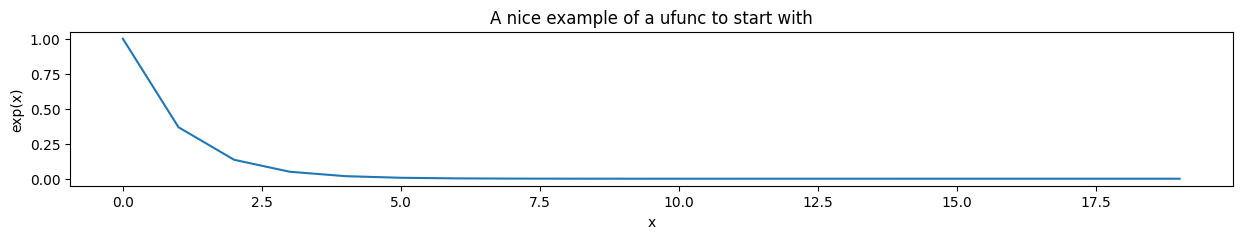

In [18]:
plt.figure(figsize=(15, 2))
x = np.arange(20)
plt.plot(x, np.exp(-x))
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.title('A nice example of a ufunc to start with')
plt.show()

### <div dir=rtl> שאלה 1</div>
<div dir=rtl>
     ינאי החקלאי יצא אל השדה כדי לבחון מינים של אירוסים. הוא בחן 150 פרחי אירוס משלושה מינים שונים ועבורם מדד את אורך ורוחב עלי הגביע (sepal) ואת אורך ורוחב עלי הכותרת (petal). <br />
    א. שרטטו דיאגרמת פיזור של כל פרט המתארת את אורך עלי הכותרת כתלות באורך עלי הגביע
</div>

In [54]:
from sklearn import datasets
iris = datasets.load_iris()
print(type(iris), type(iris.data))
print(iris.data.shape)
print(iris.feature_names)

<class 'sklearn.utils._bunch.Bunch'> <class 'numpy.ndarray'>
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


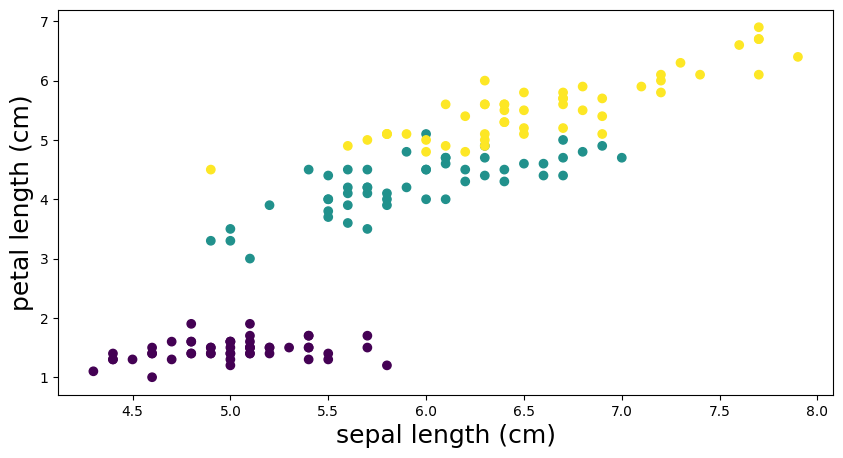

In [33]:
plt.figure(figsize=(10, 5))
# plot three variables of data with X, Y and Color:
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)

# TODO  could we avoid the 'magic' indices "0", "2"? can we have named columns?

plt.xlabel(iris.feature_names[0], fontsize = 18)
plt.ylabel(iris.feature_names[2], fontsize = 18)
plt.show()

<div dir=rtl>
אפשר להשתמש בפונקציה rcparams על מנת לקבע את ברירת המחדל של העיצוב

https://matplotlib.org/stable/tutorials/introductory/customizing.html
</div>

In [34]:
params = {'figure.figsize': (20, 10),
         'axes.labelsize': 20,
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)

Text(0, 0.5, 'petal length (cm)')

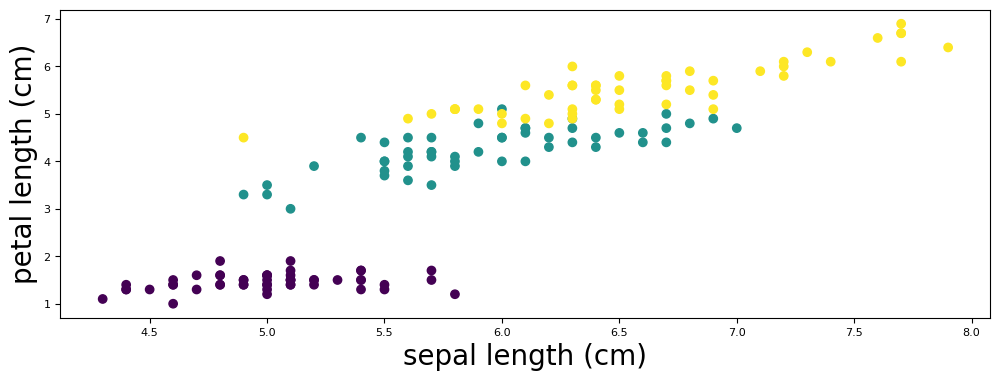

In [35]:
plt.figure(figsize=(12,4))

# Plot three variables (2 numerical, 1 categorical) using X, Y, color.
# TODO think: can we draw 3 numericals? 4?  5? 
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

<div dir=rtl>
     ב. בדרכו חזרה הבייתה נתקל ינאי בשלושה פרחי אירוס בערוגה. מיד מדד אותם ורשם במחברת. כך:
</div>

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) |
|------|------|------|------|
| 6.0 | 5.5 | 1.2 | 0.9 |
| 6.2 | 0.5 | 2.3 | 9.0 |
| 7.0 | 3.0 | 7.0 | 3.1 |

<div dir=rtl>
     מכיוון שהתוצאות שהתקבלו היו חריגות ינאי היה מבולבל. <br />
    שרטטו גם את שלוש המדידות על דיאגרמת הפיזור וחשבו לכל מדידה את מרחקה בדיאגרמה מכל אחת מהמדידות האחרות.
</div>

In [57]:
plant_measurements = np.array([
    [ 6.0 , 5.5 , 1.2 , 0.9 ],
    [ 6.2 , 0.5 , 2.3 , 9.0 ],
    [ 7.0 , 3.0 , 7.0 , 3.1 ]
]
)

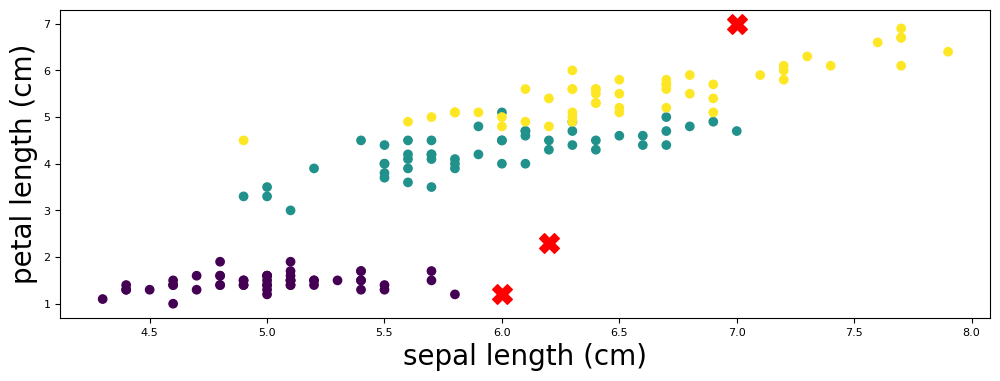

In [37]:
plt.figure(figsize=(12,4))
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)
plt.scatter(plant_measurements[:,0], plant_measurements[:,2], marker='X', c='r', s=200)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


<div dir=rtl>
    אנחנו מחשבים את המרחק כך:
</div>

$$ dist(x,y) = \sqrt{\sum_{d}^D{(x_d - y_d)^2 }} $$

<div dir=rtl>
    עבור מרחב בעל D מימדים. <br />

<div dir=rtl>
    פתרון "נאיבי" - שתי לולאות. <br />
    יקר חישובית אבל קל להבנה אינטואיטיבית:
    
</div>

In [27]:
def distance_two_loops(a, b):
    '''
    a:
        numpy array [Nax2]
    b:
        numpy array [Nbx2]
        
    returns:
        numpy array [NaxNb]
    '''
    
    out = np.zeros((a.shape[0], b.shape[0]))
    
    for i_a in range(a.shape[0]):
        for i_b in range(b.shape[0]):
            dist_sq = np.power((a[i_a,:] - b[i_b,:]), 2).sum()
            out[i_a,i_b] = dist_sq
            
    return np.sqrt(out)  # elementwise

In [28]:
distances = distance_two_loops(iris.data[:,[0,2]], plant_measurements[:,[0,2]])
distances.shape, distances[:5,:]


((150, 3),
 array([[0.92195445, 1.42126704, 5.91354378],
        [1.11803399, 1.58113883, 5.98080262],
        [1.30384048, 1.80277564, 6.14654374],
        [1.43178211, 1.78885438, 6.00083328],
        [1.0198039 , 1.5       , 5.9464275 ]]))

<div dir=rtl>
    פתרנו את השאלה. נבדוק כמה זמן לוקח לפונקציה לרוץ.
    
</div>

In [29]:
%timeit distance_two_loops(iris.data[:,[0,2]], plant_measurements[:,[0,2]])

2.9 ms ± 92.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


לכאורה לא הרבה זמן אבל מה היה קורה אם היה לנו אלף רשומות בדאטאסט? מליון?
    לרוב יהיו לנו הרבה יותר רשומות לעבוד איתן ולכן תמיד ננסה לממש פיתרון בעזרת ויקטריזציה 
 נרצה לפתור את המשוואה ישירות עם נאמפיי. במקרה הזה נצטרך לבצע מניפולציה על המערכים על מנת שנוכל להפעיל עליהם פעולת חיסור אחת בעזרת נאמפיי.  

 כדי להתמודד עם האתגר, נבצע אימון בזק על נושא הרחבת מימדים בנאמפיי ברמה בסיסית

In [51]:
# BROADCASTING Sandbox (A)

# TODO read about broadcasting: 
#      https://numpy.org/doc/stable/user/basics.broadcasting.html
# NOTE the * is elementwise, NOT matrix multiplication
# TODO understand how the code works
# NOTE how we write automated tests that go over test cases list that can be grown 
# TODO add more shape combinations, see that you understand what works.

for shape1, shape2 in [((5, 3), (2, 5, 3)),  
                       ((2, 5), (2, 5, 3)),
                       ((2, 5, 1), (2, 5, 3))]:
    try:
        a, b = np.random.randn(*shape1), np.random.randn(*shape2)
        print(a.shape, b.shape, (a * b).shape)
    except:
        print(a.shape, b.shape, " * failed")

# TODO what to do in the failed cases?

(5, 3) (2, 5, 3) (2, 5, 3)
(2, 5) (2, 5, 3)  * failed
(2, 5, 1) (2, 5, 3) (2, 5, 3)


ברודקסטינג הוא כמו קסטינג - שינוי משתנה\ים כדי שהאופרציה תהיה מוגדרת

מסקנה:  נאמפיי עושה מאמץ מירבי לפרש את הכוונות שלנו עפ סט חוקים סדור , 
לפעמים צריך (או לפחות רצוי) לעזור לו על-ידי הוספת מימדי דמי, בכדי שמספר המימדים יהיה זהה 

In [52]:
# BROADCASTING Sandbox (B) - helping it by "adding dummy axes/dimensions"

a, b = np.ones(3), np.arange(3) 
print("A: ", a.shape, b.shape, '\n', a+b)

a, b = np.ones((3,1)), np.arange(3)[:, None]
print("B: ", a.shape, b.shape, '\n', a+b)

a, b = np.ones((1,3)), np.arange(3)[None, :]
print("C: ", a.shape, b.shape, '\n', a+b)

a, b = np.ones((1,3)), np.arange(3)[:, None]
print("D: ", a.shape, b.shape, '\n', a+b)


A:  (3,) (3,) 
 [1. 2. 3.]
B:  (3, 1) (3, 1) 
 [[1.]
 [2.]
 [3.]]
C:  (1, 3) (1, 3) 
 [[1. 2. 3.]]
D:  (1, 3) (3, 1) 
 [[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


בחזרה לתרגיל שלנו.

נרחיב כל מטריצה באמצעות הוספת מימד במקום הנכון כך שנוכל לבצע את פעולת החיסור בין המטריצות:   

הרחבת מימד כלומר הוספת מימד באורך 1, למשל:

 וקטור --> מטריצה של שורה\עמודה בודדת, 

או מטריצה --> תיבה עם פרוסה בודדת

In [55]:
# ! creating dummy axis at 1 
print(iris.data[:,             [0,2]].shape)
print(iris.data[:,  np.newaxis, [0,2]].shape)
print(iris.data[:,  None,       [0,2]].shape)  # equivalent syntax
print(iris.data[:5, np.newaxis, [0,2]])


(150, 2)
(150, 1, 2)
(150, 1, 2)
[[[5.1 1.4]]

 [[4.9 1.4]]

 [[4.7 1.3]]

 [[4.6 1.5]]

 [[5.  1.4]]]


In [31]:
# ! creating dummy axis at 0
print(plant_measurements[np.newaxis, :, [0,2]].shape)
print(plant_measurements[np.newaxis, :, [0,2]])

(1, 3, 2)
[[[6.  1.2]
  [6.2 2.3]
  [7.  7. ]]]


In [58]:
# ! one-liner to create a (N x n x 2) tensor of dx,dy for all (o: 1..N=150, X: 1..n=3) pairs
#   aka (N x n) matrix of  len-2 (x,y) vectors
sub = iris.data[:, np.newaxis, [0,2]] - plant_measurements[np.newaxis, :, [0,2]]
sub.shape

(150, 3, 2)

TODO read about broadcasting:
https://numpy.org/doc/stable/user/basics.broadcasting.html

   האופרטורים של  תמיד יחפשו דרך שבה ניתן להביא את שני האופרנדים לאותו סט מימדים ע"י פעולות "מתבקשות" כמו שכפול  ("שידור רחב")  לאורך הציר התואם. כן צריך לעזור למנגנון להבין מהם הצירים התואמים, ואת זה עשינו קודם

   shapes: arr(shape=(X, 1, 2)) + arr(shape=(1, Y, 2)) --> arr(shape=(X, Y, 2))
    
    כל שנותר הוא להעלות בריבוע את ההפרש בכל ציר,
     לסכום על הצירים כלומר על המימד השלישי ולהוציא שורש.

In [39]:
def distance_no_loops(a, b):
    '''       
    # TODO nice doc but how to improve func interface/API further?    
    a: numpy array [Na x 2]
    b: numpy array [Nb x 2]
    
    returns:
        numpy array [Na x Nb]
    '''
    # Using intermediary tensor: (N x n) matrix of (x,y) len-2 vectors 
    # (TODO bonus: read about OUTER product vs. INNER product)
    return ((a[:, np.newaxis, :] - b[np.newaxis, :, :])**2).sum(axis=2)**0.5
     

In [40]:
distances = distance_no_loops(iris.data[:,[0,2]], plant_measurements[:,[0,2]])
print(distances[:5,:])

[[0.92195445 1.42126704 5.91354378]
 [1.11803399 1.58113883 5.98080262]
 [1.30384048 1.80277564 6.14654374]
 [1.43178211 1.78885438 6.00083328]
 [1.0198039  1.5        5.9464275 ]]


In [41]:
%timeit distance_no_loops(iris.data[:,[0,2]], plant_measurements[:,[0,2]])
# x100 !

34.2 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<div dir=rtl>
    ג. מצאו את נקודת המדידה הקרובה ביותר מהשדה לכל אחד משלושת האירוסים בערוגה.
</div>

In [42]:
print('distances.shape: ', distances.shape)
minimum_dists_points_index = distances.argmin(axis=0)
minimum_dists_points_index  # between 0 and 150

distances.shape:  (150, 3)


array([ 14,  18, 118], dtype=int64)

In [43]:
# NOTE numpy indexing using a variable - index array
closest_points = iris.data[minimum_dists_points_index, :]
closest_points

array([[5.8, 4. , 1.2, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3]])

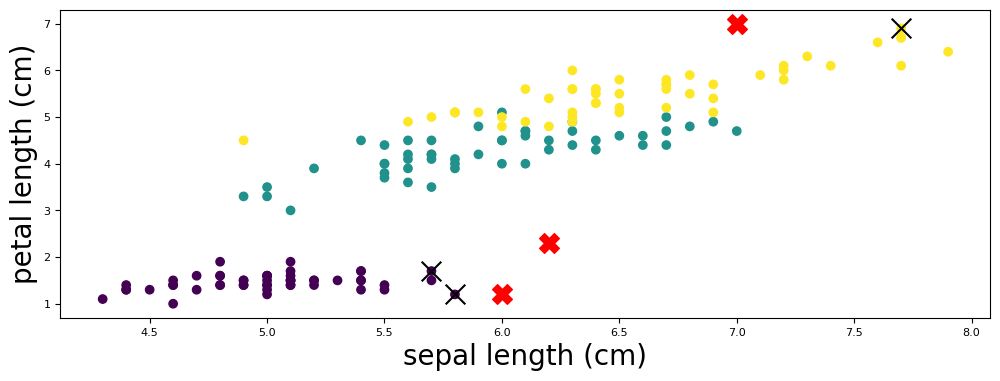

In [44]:
plt.figure(figsize=(12, 4))
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)
plt.scatter(plant_measurements[:,0], plant_measurements[:,2], marker='X', c='r', s=200)
plt.scatter(closest_points[:,0], closest_points[:, 2], marker='x', c='k', s=200)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()
# TODO think does it look a bit weird for one of the points?  WHY
#       maybe gotta modify visualizaation?  maybe gotta modify distance metric? 

# <div dir=rtl> Pandas </div>
<div dir=rtl>
    פנדס היא חבילה לdata science המיועדת לעבודה אופטימלית עם מידע טבלאי.  פנדס יעילה במיוחד בפעולות על מסדי נתונים בגדלים בינוניים (גיגות עד עשרות גיגות). פנדס נבנתה סביב נאמפיי לכן כל הכלים הקיימים בנאמפיי נמצאים בצורה מקבילה בפנדס וכמובן ישנם עוד הרבה כלים נוספים.
</div>

In [39]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd

<div dir=rtl>
    הערה: הסיומת as pd היא לנוחות בלבד. <br />
    לפנדס שני אובייקטים עיקריים: Series ו DataFrame. האובייקט Series מייצג ווקטור של ערכים וDataFrame מטריצה.
</div>

In [47]:
v = pd.Series(['a','b',10,'d'])
v

0     a
1     b
2    10
3     d
dtype: object

<div dir=rtl>
    נשים לב לשני דברים: לצד הערכים שהכנסנו יש אינדקס רץ. לכל ערך יש אינדקס. בסוף הווקטור מצוין מה ה dtype שלו.
</div>

In [48]:
df = pd.DataFrame([
    ['a','b','c','d'],
    ['A','B','C','D'],
    ['alpha','beta','gamma','delta']
])

df

,0,1,2,3
0,a,b,c,d
1,A,B,C,D
2,alpha,beta,gamma,delta


<div dir=rtl>
    פנדס מאפשר מתן שמות הן לעמודות והן לאינדקסים.
</div>

In [49]:
df = pd.DataFrame([
    ['Sharp object accident', pd.Timestamp('12:15').time(), 36.5,75],
    ['Burns', pd.Timestamp('04:53').time(), 38.1,32],
    ['Anemia', pd.Timestamp('13:54').time(), 37.0,80]
],
columns=['Cause of illness', 'Time of admission', 'Temp (c)', 'Weight (kg)'],
index=['Luke', 'Gollum', 'Irony Man'])

df
# NOTE:  remember how we asked if we can have a numpy array with meaningful anmes for cloumns/rows?  inside the object not just as separate ones..

,Cause of illness,Time of admission,Temp (c),Weight (kg)
Luke,Sharp object accident,12:15:00,36.5,75
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


In [50]:
df['Temp (c)']
# df['Luke']

Luke         36.5
Gollum       38.1
Irony Man    37.0
Name: Temp (c), dtype: float64

<div dir=rtl>
    ,אינדקסינג בפנדס מתאפשר בעיקר בזכות הפונקציה .loc <br />
      הפונקציה מקבלת לייבל של אינדקס ועמודה או מערך בוליאני

</div>

https://towardsdatascience.com/conditional-selection-and-assignment-with-loc-in-pandas-2a5d17c7765b


In [46]:
df.loc['Luke']

Cause of illness     Sharp object accident
Time of admission                 12:15:00
Temp (c)                              36.5
Weight (kg)                             75
Name: Luke, dtype: object

In [47]:
# also possible to find just by running number with iloc
df.iloc[2]

Cause of illness       Anemia
Time of admission    13:54:00
Temp (c)                 37.0
Weight (kg)                80
Name: Irony Man, dtype: object

In [48]:
df.loc[:,'Temp (c)']

Luke         36.5
Gollum       38.1
Irony Man    37.0
Name: Temp (c), dtype: float64

In [49]:
df.loc[df.index!='Luke']


,Cause of illness,Time of admission,Temp (c),Weight (kg)
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


In [50]:
df.loc[df['Temp (c)']>=37]


,Cause of illness,Time of admission,Temp (c),Weight (kg)
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


<div dir=rtl>
   לא ניתן לפנות באמצעות loc לאינדקסים נומריים  <br />
      

</div>

<div dir=rtl>
   אבל כן אפשר לפנות לאינדקסים נומריים באמצעות iloc  <br />
      

</div>

In [52]:
#df.loc[0,3]
df.iloc[0,3]


75

<div dir=rtl>
    יכולת חשובה של פנדס היא היכולת לקרוא ולכתוב אובייקטים לקבצים. <br />
    יש המון סוגי קבצים נתמכים, בניהם:
</div>

 - Excel
 - JSON
 - Pickle
 - SQL
 - CSV
 - ...
 
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

<div dir=rtl>
    נקח את CSV כדוגמה. הסיומת CSV, או comma separated values, מציינת קובץ טקסט המכיל מידע טבלאי. הפורמט הוא פורמט פתוח - לכן זמין לתצוגה בשלל של תוכנות (כולל כתבן ואקסל) - הוא נוח לקריאה אנושית גם בצורה הטקסטואלית שלו ונוח לכתיבה אנושית בפורמט הטקסטואלי שלו. החסרונות - אין שום דחיסה של המידע, עיצוב של התאים השונים לא נשמר בתוך הקובץ לכן יעלם אחרי טעינה מחדש, זמני הכתיבה והקריאה של קבצים מהסוג הזה יחסית ארוכים ומידע נשמר אך ורק בפורמט טקסט. <br />
    נדגים: <br />
    הטבלה למעלה בפורמט CSV בכתבן תהיה
</div>


<div dir=rtl>
    ובאקסל היא תיראה כך:
</div>

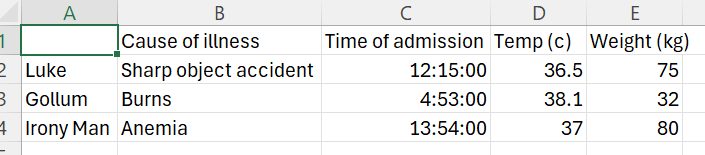

In [53]:
df.to_csv('2.df.csv')

פאנדאס מאפשר לכתוב וכמובן גם לקרוא קבצים טבלאיים, מה שמאפשר תקשורת קלה בין פייתון לאקסל

In [54]:
df2 = pd.read_csv('2.df.csv', index_col=0)
df2

,Cause of illness,Time of admission,Temp (c),Weight (kg)
Luke,Sharp object accident,12:15:00,36.5,75
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80
